<a href="https://colab.research.google.com/github/sourabhkmr/Personal-Projects/blob/main/EMD_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

minus_step = 9
frequency = 1
total_time = 1
res = 0.001
maxmin_count = 0

time = np.arange(0, total_time, res)
amplitude = np.sin(2 * np.pi * frequency * total_time * (time/time[-1]))
np.mean(amplitude)

0.0

In [ ]:
f1 = 4
f2 = 10
f3 = 1
total_time = 5
time = np.arange(0, total_time, res)

sig1 = np.sin(2 * np.pi * f1 * time)
sig2 = np.sin(2 * np.pi * f2 * time)
sig3 = np.sin(2 * np.pi * f3 * time)
signal = sig1 + sig3 + sig2

print(time[-1])

4.999


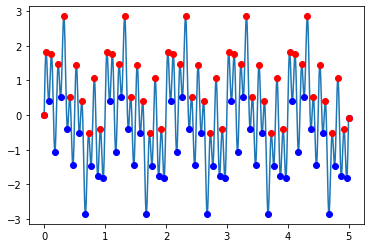

In [ ]:
h = signal

location = []
maxima_location = []
minima_location = []
maxima_points = []
minima_points = []
maxima_time = []
minima_time = []

maxima_location.append(0)
minima_location.append(0)

minima_total = 0
maxima_total = 0
zerocrossing_count = 0

d = np.diff(h)

i = 0

for x in range(len(h)-2):
  if np.sign(d[x]) != np.sign(d[x+1]):
    maxmin_count += 1
    location.append(x+1)
    i += 1

location_array = np.asarray(location)

i = location_array[0]
j = location_array[1]

if h[i] > h[j]:
  count = 0
  while count < len(location_array)-1:
    maxima_location.append(location_array[count])
    minima_location.append(location_array[count+1])
    count += 2
else:
  count = 0
  while count < len(location_array)-1:
    maxima_location.append(location_array[count+1])
    minima_location.append(location_array[count])
    count += 2

maxima_location.append(len(h)-1)
minima_location.append(len(h)-1)

maxima_location_array = np.asarray(maxima_location)
minima_location_array = np.asarray(minima_location)

for x in range(len(maxima_location_array)):
  i = maxima_location_array[x]
  maxima_points.append(h[i])
  maxima_time.append(time[i])

for x in range(len(minima_location_array)):
  i = minima_location_array[x]
  minima_points.append(h[i])
  minima_time.append(time[i])

maxima_points_array = np.asarray(maxima_points)
minima_points_array = np.asarray(minima_points)
maxima_time_array = np.asarray(maxima_time)
minima_time_array = np.asarray(minima_time)

plt.plot(time, h)
plt.plot(minima_time_array, minima_points_array, 'bo')
plt.plot(maxima_time_array, maxima_points_array, 'ro')
plt.show()

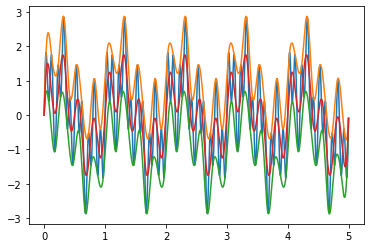

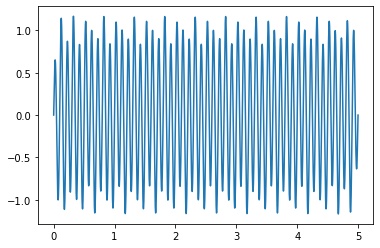

In [ ]:
cs_maxima = CubicSpline(maxima_time_array, maxima_points_array)
cs_minima = CubicSpline(minima_time_array, minima_points_array)

max_env = cs_maxima(time)
min_env = cs_minima(time)

mean = np.zeros(len(max_env))
for x in range(len(max_env)):
  mean[x] = 0.5 * (max_env[x] + min_env[x])

plt.plot(time, h)
plt.plot(time, max_env)
plt.plot(time, min_env)
plt.plot(time, mean)
plt.show()
plt.close()

mode = h - mean

plt.plot(time, mode)
plt.show()
plt.close()

In [ ]:
mean_IMF = np.mean(mode)

maxima_total = len(maxima_points_array) - 2
minima_total = len(minima_points_array) - 2

print(maxima_total, minima_total, mean_IMF)

prevh = h
#h = mode

sum = 0
for x in range(len(h)):
  std_dev = ((prevh[x]-mode[x])**2) / (prevh[x]**2 + 0.000001)
  print(std_dev)
  sum += std_dev

print(sum)



In [ ]:
trial = np.arange(1, 10)
trial2 = trial + 1
trial3 = trial2 - trial
print(trial3)


[1 1 1 1 1 1 1 1 1]
